In [103]:
%matplotlib inline

In [104]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json

In [105]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'

In [106]:
def load_dataset(name):
    with open(name) as fp:
        a = np.loadtxt(fp)
    return a

def get_sigma():
    with open("mod_labels.dat") as fp:
        contents = list(fp)
        return float(contents[0].strip())

def get_labels():
    with open("mod_labels.dat") as fp:
        contents = list(fp)
        items = map(lambda x: x.strip().split(), contents[1:])
        return map(lambda (x,y): (int(x),y), items)

In [107]:
siminfo = json.load(open("simulationinfo.json"))
router = int(siminfo["router"])
bridge1 = int(siminfo["n_bridge"])
bridge2 = int(siminfo["m_bridge"])

In [108]:
router_i1 = load_dataset("router_top_queue.dat".format(router))
router_i2 = load_dataset("router_bottom_queue.dat".format(router))
bridge1_i = load_dataset("bridge_top_queue.dat".format(bridge1))
bridge2_i = load_dataset("bridge_bottom_queue.dat".format(bridge2))

In [109]:
np.max(router_i1[:,1])

43.0

In [110]:
np.max(router_i2[:,1])

39.0

In [111]:
np.max(bridge1_i[:,1])

240.0

In [112]:
np.max(bridge2_i[:,1])

199.0

In [113]:
router_i1[:1000]

array([[  0.997923,   1.      ,   0.      ],
       [  0.997923,   0.      ,   0.      ],
       [  0.998586,   1.      ,   0.      ],
       ..., 
       [  5.00243 ,   0.      ,  11.0428  ],
       [  5.00401 ,   1.      ,  11.0207  ],
       [  5.00401 ,   0.      ,  11.0207  ]])

In [114]:
def biggest_in_range(a, x, spread):
    m = []
    for v in a:
        if x-spread <= v[0] <= x+spread:
            m.append(v[1])
    try:
        return max(m)
    except ValueError:
        return 5
bir = biggest_in_range

In [115]:
def ewma_plot(data):
    WQ = 0.0002
    r = []
    ov = 0.0
    for (x,y) in data:
        nv = (1.0-WQ)*ov+WQ*y
        r.append([x,nv])
        ov = nv
    return np.array(r)

In [116]:
def select_time_interval(data, start, stop):
    r = []
    for q in data:
        if start <= q[0] <= stop:
            r.append(q)
        elif q[0] > stop:
            break
    return np.array(r)

In [117]:
def plot_queue(data, start=None, stop=None):
    #ewma = ewma_plot(data)
    if start != None and stop != None:
        data = select_time_interval(data,start,stop)
        #ewma = select_time_interval(ewma,start,stop)
    plt.plot(data[:,0], data[:,1], data[:,0], data[:,2])
    labels = get_labels()
    for x, anno in labels:
        x /= 1000.0
        s = (get_sigma() / 1000.0) * 100
        plt.annotate(anno, xy=(x,bir(data, x, s)))
    return plt

def plot_ewma(data, start=None, stop=None):
    #ewma = ewma_plot(data)
    if start != None and stop != None:
        data = select_time_interval(data,start,stop)
        #ewma = select_time_interval(ewma,start,stop)
    plt.plot(data[:,0], data[:,2])
    labels = get_labels()
    for x, anno in labels:
        x /= 1000.0
        s = (get_sigma() / 1000.0) * 100
        plt.annotate(anno, xy=(x,bir(data, x, s)))
    return plt

In [135]:
def plot_queue_fancy(data, start=None, stop=None, ewma=True):
    #ewma = ewma_plot(data)
    if start != None and stop != None:
        data = select_time_interval(data,start,stop)
        #ewma = select_time_interval(ewma,start,stop)
    plt.title("Queue Size Over Time")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Queue Size (packets)")
    p1, = plt.plot(data[:,0], data[:,1], label="Queue Size", color='#333333')
    p2, = plt.plot(data[:,0], data[:,2], label="Avg. Queue Size", ls='dotted', color='black')
    plt.legend(handles=[p1, p2])
    labels = get_labels()
    for x, anno in labels:
        x /= 1000.0
        s = (get_sigma() / 1000.0) * 100
        plt.annotate(anno, xy=(x,bir(data, x, s)))
    return plt


<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

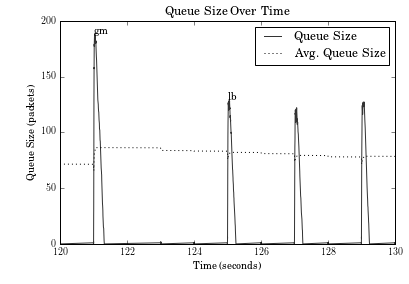

In [137]:
plot_queue_fancy(bridge2_i, 120, 130)

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

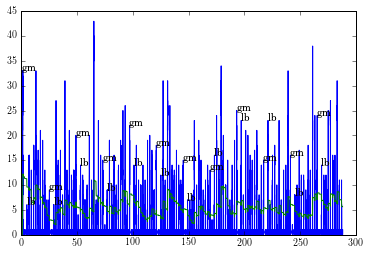

In [120]:
plot_queue(router_i1)

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

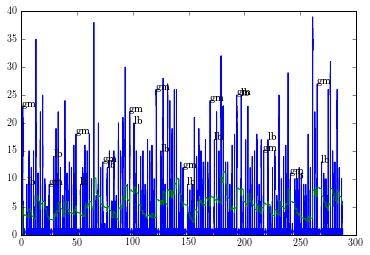

In [121]:
plot_queue(router_i2)

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

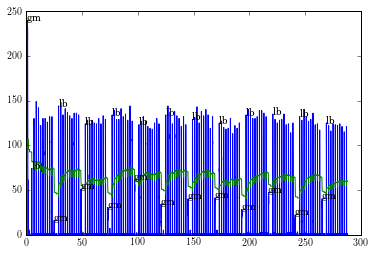

In [122]:
plot_queue(bridge1_i)

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

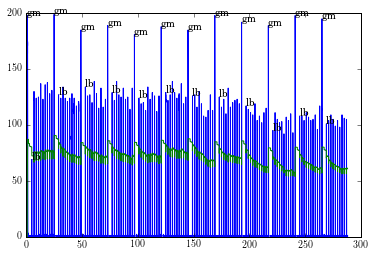

In [123]:
plot_queue(bridge2_i)

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

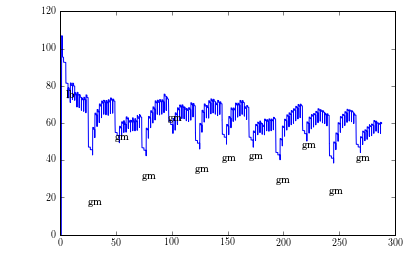

In [124]:
plot_ewma(bridge1_i)

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

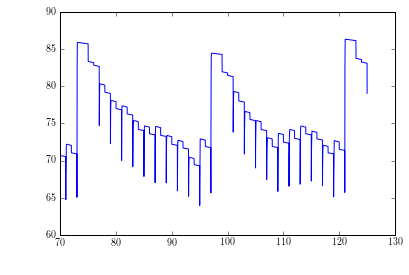

In [125]:
plot_ewma(bridge2_i,70,125)

In [126]:
def plot_many(data):
    x = data[:,0]
    ys = [data[:,i] for i in range(1,len(data[0]))]
    args = []
    for y in ys:
        args.append(x)
        args.append(y)
    plt.plot(*args)
    return plt

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

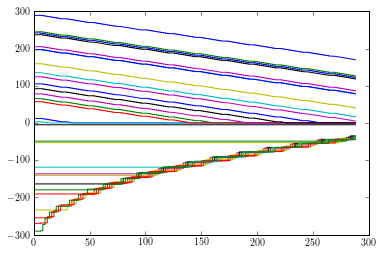

In [127]:
m = load_dataset("migrations.dat")
plot_many(m)


In [128]:
sum(m[-1][1:])

354.0

In [129]:
sum(m[0][1:])

354.0

In [130]:
sum(np.abs(m[-1][1:]-m[0][1:]))/2

1604.0

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

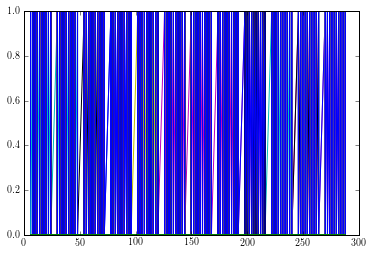

In [131]:
m = load_dataset("losses.dat")
plot_many(m)

<module 'matplotlib.pyplot' from '/usr/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

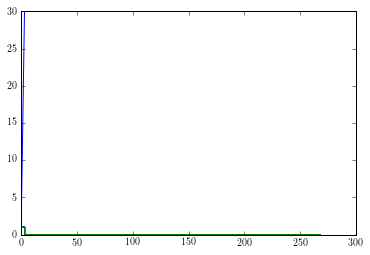

In [132]:
m = load_dataset("groupsizes.dat")
plot_many(m)